In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Dependencies
import pandas as pd
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import datetime as dt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: June Temperature Summary

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6)


In [6]:
#  3. Convert the June temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
##print(results)

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_june = pd.DataFrame(results, columns=['date','June Temps'])
df_june.set_index(df_june['date'], inplace=True)

In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_june.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: December Temperature Summary

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12)

In [10]:
# 7. Convert the December temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(results, columns=['date','December Temps'])
df_dec.set_index(df_dec['date'], inplace=True)

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3-1: Graph for June Temperatures

Text(0.5, 0, 'Temperature')

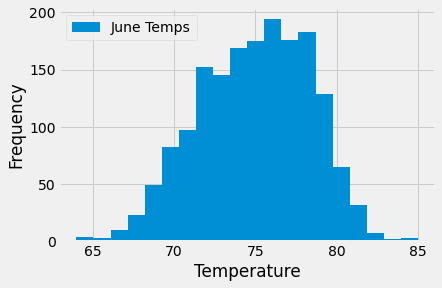

In [13]:
df_june.plot.hist(bins=20)
plt.xlabel("Temperature")
#plt.tight_layout()

## D3-2: Graph for December Temperatures

Text(0.5, 0, 'Temperature')

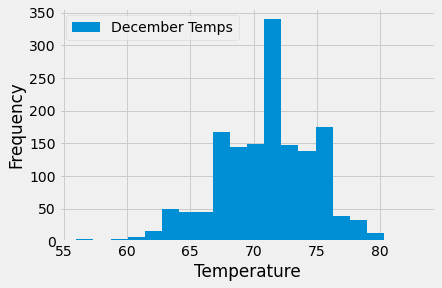

In [14]:
df_dec.plot.hist(bins=20)
plt.xlabel("Temperature")
#plt.tight_layout()

## D3-3: June Precipitation Summary

In [15]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of June. 
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6)

# Convert the June precipitation to a list.
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()

# Create a DataFrame from the list of precipitation for the month of June. 
df_june_prcp = pd.DataFrame(results, columns=['date','June Rain'])
df_june_prcp.set_index(df_june_prcp['date'], inplace=True)

# Calculate and print out the summary statistics for the June precipitation DataFrame.
df_june_prcp.describe()

,June Rain
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


## D3-4: December Precipitation Summary

In [16]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of December. 
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12)

# Convert the December precipitation to a list.
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()

# Create a DataFrame from the list of precipitation for the month of December. 
df_dec_prcp = pd.DataFrame(results, columns=['date','December Rain'])
df_dec_prcp.set_index(df_dec_prcp['date'], inplace=True)

# Calculate and print out the summary statistics for the December precipitation DataFrame.
df_dec_prcp.describe()

,December Rain
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
